In [4]:
# prompt: upload files in colab

from google.colab import files
uploaded = files.upload()


Saving adult.data to adult.data
Saving adult.names to adult.names
Saving adult.test to adult.test


In [46]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 4.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

# Including required libraries

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

# Dataset(train and test)

In [5]:
df_train=pd.read_csv("adult.data",names=['Age','Workclass','fnlwgt','Education','Education_num','Marital_status','Occupation','Relationship','Race','Sex','Capital_gain','Capital_loss','hrs_p_week','Native','Salary'],na_values=' ?')
df_train=df_train.applymap(lambda s:s.strip() if isinstance(s,str) else s)

df_test=pd.read_csv("adult.test",names=['Age','Workclass','fnlwgt','Education','Education_num','Marital_status','Occupation','Relationship','Race','Sex','Capital_gain','Capital_loss','hrs_p_week','Native','Salary'],na_values=' ?')
df_test=df_test.applymap(lambda s:s.strip() if isinstance(s,str) else s)

<ipython-input-5-b295b4279782>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_train=df_train.applymap(lambda s:s.strip() if isinstance(s,str) else s)
<ipython-input-5-b295b4279782>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_test=df_test.applymap(lambda s:s.strip() if isinstance(s,str) else s)


In [6]:
df_train.head()

,Age,Workclass,fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,hrs_p_week,Native,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
df_test.drop(index=0,inplace=True)

In [10]:
df_test.head()

,Age,Workclass,fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,hrs_p_week,Native,Salary
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,NaN,103497.0,Some-college,10.0,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


In [12]:
#Changing the datatypes of respective columns

#x=[(type(i),i,) for i in df.columns]
typ={'Age':int,'Workclass':str,'fnlwgt':int,'Education':str,'Education_num':int,
     'Marital_status':str,'Occupation':str,'Relationship':str,'Race':str,'Sex':str,
     'Capital_gain':int,'Capital_loss':int,'hrs_p_week':int,'Native':str,'Salary':str
     }
df_train=df_train.astype(typ)
df_test=df_test.astype(typ)

s1={'Sex_':(df_train['Sex'].str.strip()=='Male'),'Salary_':(df_train['Salary'].str.strip()=='>50K')}
temp=pd.DataFrame(s1)
s2={'Sex_':(df_test['Sex'].str.strip()=='Male'),'Salary_':(df_test['Salary'].str.strip()=='>50K.')}
temp2=pd.DataFrame(s2)

#un1={i:df[i].nunique() for i in df.columns}

In [16]:
#changing datatypes of 'Sex' and 'Salary' to bool

temp_=df_train.drop(['Sex','Salary'],axis=1)
df_tr=pd.concat([temp_,temp],axis=1)

temp1_=df_test.drop(['Sex','Salary'],axis=1)
df_te=pd.concat([temp1_,temp2],axis=1)


In [66]:
q1={i:df_tr[i].nunique() for i in df_tr.columns}
q2={i:df_te[i].nunique() for i in df_te.columns}
a=df_te['Workclass'].unique()
b=df_tr['Workclass'].unique()
#list(set(a)-set(b))
df_te=df_te[df_te['Workclass']!='Never-worked']
df_te=df_te[df_te['Workclass']!='nan']
df_te['Workclass'].nunique()

7

# Data Cleaning

In [68]:
#removing nan strings from the columns which has it
df_tr=df_tr[df_tr['Workclass']!='nan']
df_tr=df_tr[df_tr['Occupation']!='nan']
df_tr=df_tr[df_tr['Native']!='nan']

In [93]:
df_tr=df_tr[df_tr['Native']!='Holand-Netherlands']

In [94]:
df_tr.shape

(30161, 15)

In [95]:
#removing nan strings from the columns which has it
df_te=df_te[df_te['Workclass']!='nan']
df_te=df_te[df_te['Occupation']!='nan']
df_te=df_te[df_te['Native']!='nan']

In [83]:
df_te.shape

(15060, 15)

# Train Test Data

In [96]:
X_tr=df_tr.drop(['Salary_'],axis=1)
Y_tr=df_tr['Salary_']

In [97]:
X_tr=pd.get_dummies(X_tr)

In [86]:
X_te=df_te.drop(['Salary_'],axis=1)
Y_te=df_te['Salary_']

In [87]:
X_te=pd.get_dummies(X_te)

# Classification Before EDA

In [52]:
# models

model_lr=LogisticRegression(max_iter=2000)
model_dt=DecisionTreeClassifier()
model_rf=RandomForestClassifier(n_estimators=150,random_state=42)
model_xg=XGBClassifier(n_estimators=100,learning_rate=0.1,objective='binary:logistic')

In [203]:
# Linear Regression
model_lr.fit(X_tr,Y_tr)
pred_y_lr=model_lr.predict(X_te)
pred_y_lr_tr=model_lr.predict(X_tr)
lr_ac,lr_ac_tr=accuracy_score(Y_te,pred_y_lr),accuracy_score(Y_tr,pred_y_lr_tr)
lr_ac

0.7926294820717131

In [205]:
# Decision Tree
model_dt.fit(X_tr,Y_tr)
pred_y_dt=model_dt.predict(X_te)
pred_y_dt_tr=model_dt.predict(X_tr)
dt_ac,dt_ac_tr=accuracy_score(Y_te,pred_y_dt),accuracy_score(Y_tr,pred_y_dt_tr)
dt_ac

0.8045152722443559

In [206]:
# Random Forest
model_rf.fit(X_tr,Y_tr)
pred_y_rf=model_rf.predict(X_te)
pred_y_rf_tr=model_rf.predict(X_tr)
rf_ac,rf_ac_tr=accuracy_score(Y_te,pred_y_rf),accuracy_score(Y_tr,pred_y_rf_tr)
rf_ac_tr

0.9999668446006432

In [207]:
# xgboost
model_xg.fit(X_tr,Y_tr)
pred_y_xg=model_xg.predict(X_te)
pred_y_xg_tr=model_xg.predict(X_tr)
xg_ac,xg_ac_tr=accuracy_score(Y_te,pred_y_xg),accuracy_score(Y_tr,pred_y_xg_tr)
xg_ac_tr

0.8823977984814827

# EDA

In [122]:
Int,Obj,Bool=[],[],[]
for name,typ in dict(df_tr.dtypes).items():
    if(typ=='object'):Obj.append(name)
    if(typ=='int64'):Int.append(name)
    if(typ=='bool'):Bool.append(name)
Obj

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Native']

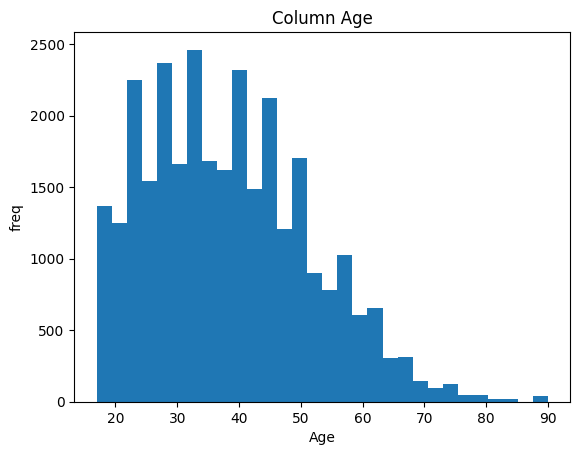

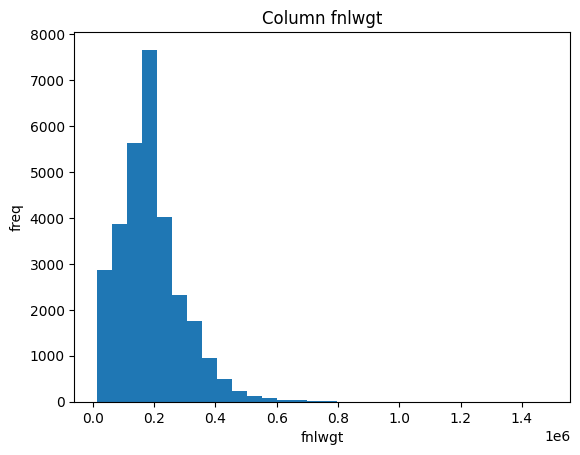

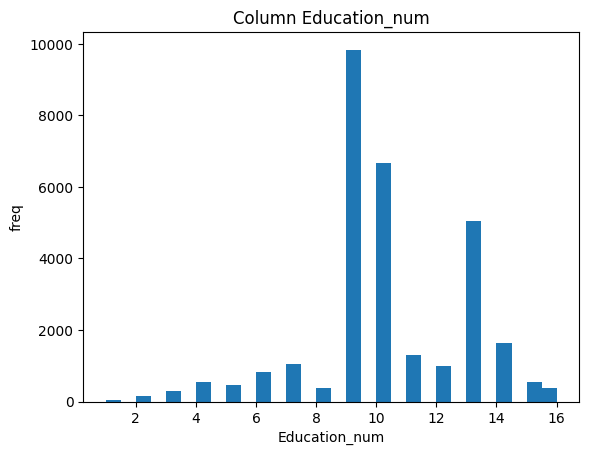

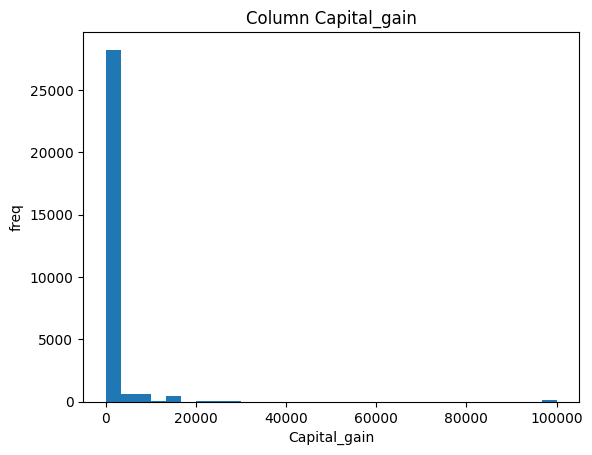

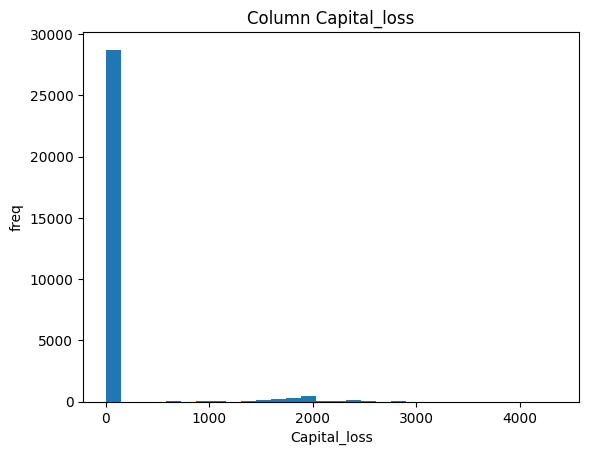

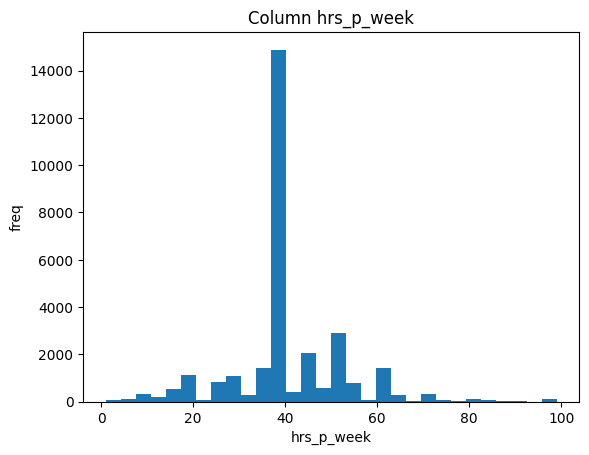

In [114]:
for i in Int:
    plt.title('Column '+i)
    plt.hist(df_tr[i],bins=30)
    plt.xlabel(i)
    plt.ylabel('freq')
    plt.show()
    print()

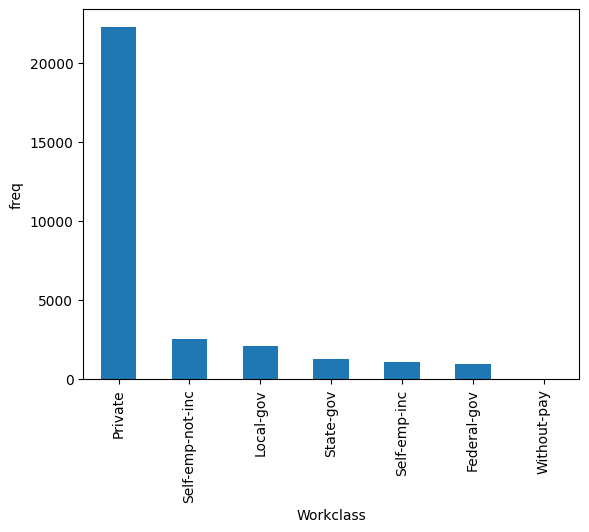

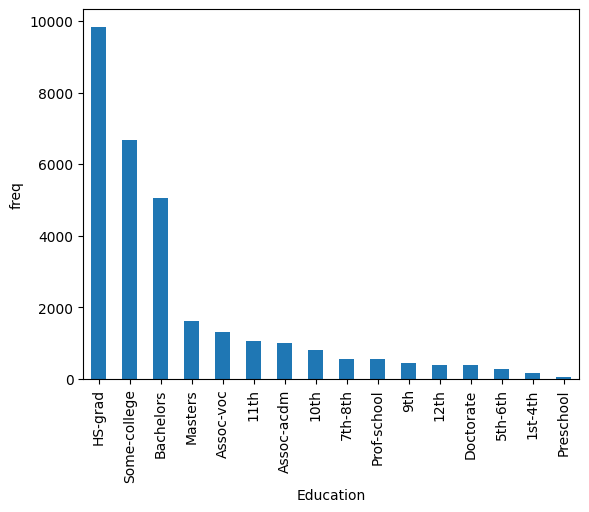

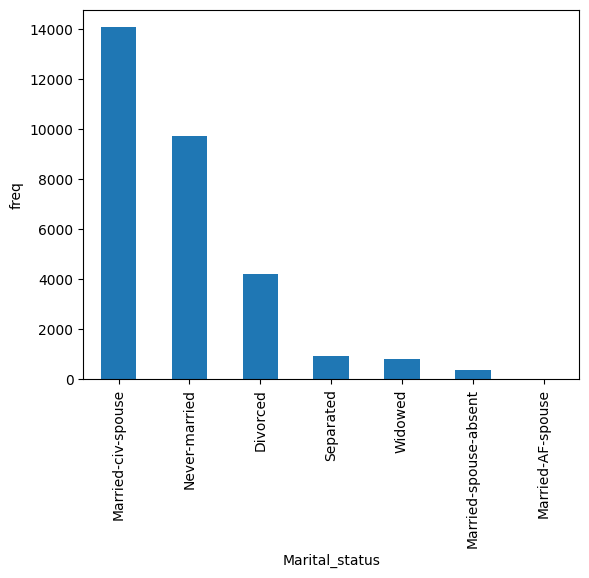

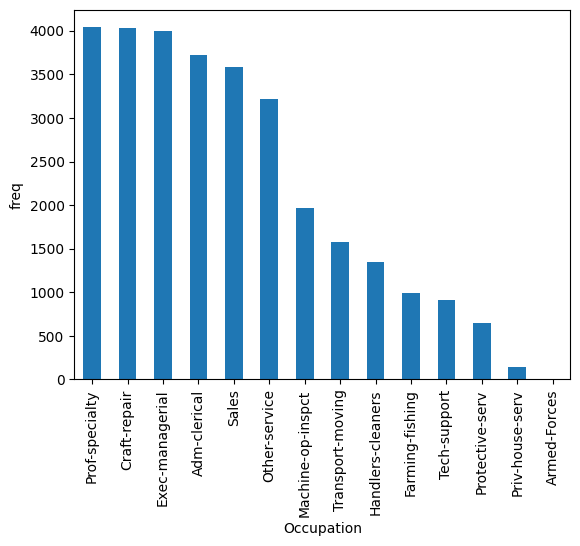

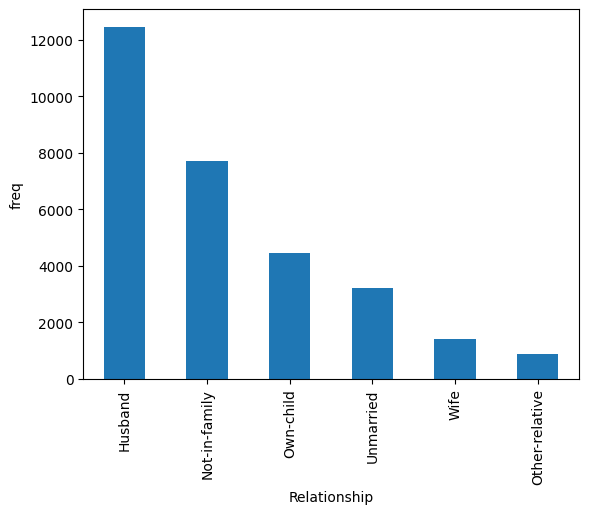

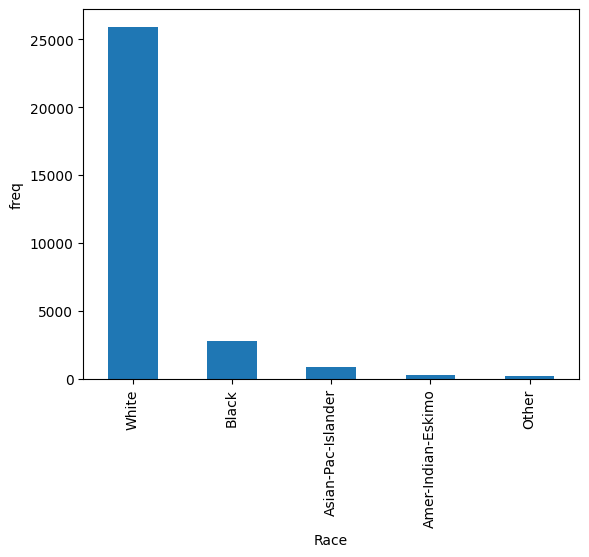

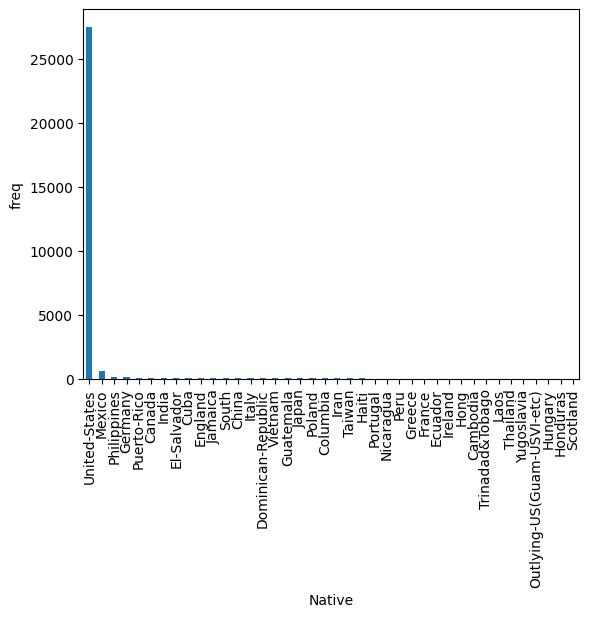

In [125]:
for i in Obj:
    df_tr[i].value_counts().plot(kind='bar')
    plt.xlabel(i)
    plt.ylabel('freq')
    plt.show()
    print()

<Axes: >

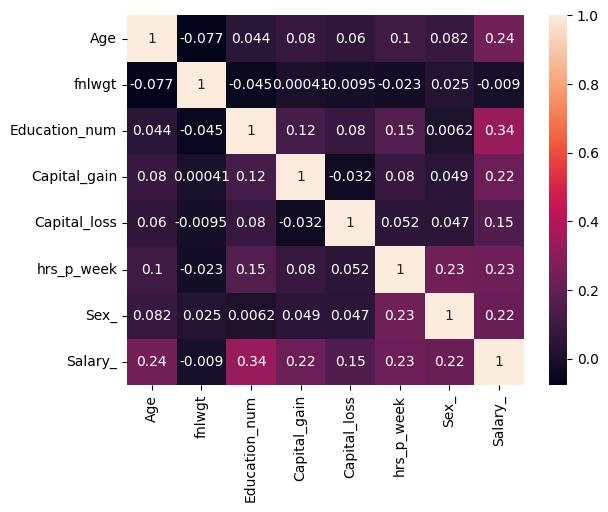

In [132]:
cor=df_tr._get_numeric_data().corr()
sns.heatmap(cor,annot=True)

In [133]:
df_tr.columns
#columns to be dropped
## --education: because we have education number which uniquely identifies education
## --relationship: because it has nothing to do with predicting salary (atleast in my opinion)
## --fnlwgt: have nothing to do with outcome salary
## --Race: seems redundant with respect to 'Native'


Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Capital_gain',
       'Capital_loss', 'hrs_p_week', 'Native', 'Sex_', 'Salary_'],
      dtype='object')

<Axes: ylabel='Frequency'>

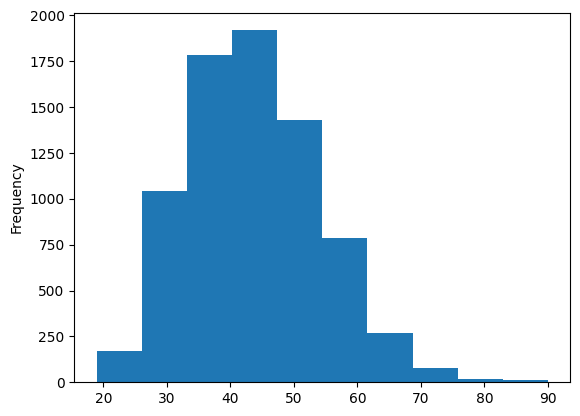

In [141]:
t=df_tr[df_tr['Salary_']==True]['Age']
t.plot(kind='hist',bins=10)

In [163]:
#removing outliers using IQR ranging for Age column

q1,med,q3=df_tr['Age'].quantile([0.25,0.50,0.75])
iqr=q3-q1

lower=q1-1.5*iqr
upper=q3+1.5*iqr

df_tr=df_tr[(df_tr['Age']>=lower) &(df_tr['Age']<=upper)]
df_tr.columns

Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Capital_gain',
       'Capital_loss', 'hrs_p_week', 'Native', 'Sex_', 'Salary_'],
      dtype='object')

In [164]:
a,m,b=df_tr['hrs_p_week'].quantile([0.25,0.50,0.75])
i=b-a

l,u=a-1.5*i,b+1.5*i

df_tr=df_tr[(df_tr['hrs_p_week']>=lower) & (df_tr['hrs_p_week']<=upper)]

In [165]:
df_tr.shape

(29661, 15)

# Classification after EDA


### Train and Test Data


In [167]:
X_tr1=df_tr.drop(['Salary_'],axis=1)
X_tr1.drop(['Education','Race','Relationship','fnlwgt'],axis=1,inplace=True)

In [168]:
X_tr1=pd.get_dummies(X_tr1)

In [169]:
Y_tr1=df_tr['Salary_']

In [170]:
X_te1=df_te.drop(['Salary_'],axis=1)
X_te1.drop(['Education','Race','Relationship','fnlwgt'],axis=1,inplace=True)

In [172]:
X_te1=pd.get_dummies(X_te1)

In [171]:
Y_te1=df_te['Salary_']

### Training Models

In [192]:
# models
model_lr1=LogisticRegression(max_iter=2000)
model_dt1=DecisionTreeClassifier()
model_rf1=RandomForestClassifier(n_estimators=150,random_state=42)
model_xg1=XGBClassifier(n_estimators=100,learning_rate=0.1,objective='binary:logistic')

In [209]:
# Linear Regression
# training phase-------
model_lr1.fit(X_tr1,Y_tr1)
#----------------------
# Classification phase----------
pred_y_lr1=model_lr1.predict(X_te1)
pred_y_lr1_tr=model_lr1.predict(X_tr1)
#---------------------------------
lr_ac1,lr_ac1_tr=accuracy_score(Y_te1,pred_y_lr1),accuracy_score(Y_tr1,pred_y_lr1_tr)
lr_ac1_tr

0.8483530562017464

In [210]:
# Decision Tree
# training phase---------
model_dt1.fit(X_tr1,Y_tr1)
#--------------------------
# Classification phase---------
pred_y_dt1=model_dt1.predict(X_te1)
pred_y_dt1_tr=model_dt1.predict(X_tr1)
#------------------------------
dt_ac1,dt_ac1_tr=accuracy_score(Y_te1,pred_y_dt1),accuracy_score(Y_tr1,pred_y_dt1_tr)
dt_ac1_tr

0.9707359832777047

In [211]:
# Random Forest
# training phase-------
model_rf1.fit(X_tr1,Y_tr1)
#-------------------------
# Classification phase-----------
pred_y_rf1=model_rf1.predict(X_te1)
pred_y_rf1_tr=model_rf1.predict(X_tr1)
#-------------------------------
rf_ac1,rf_ac1_tr=accuracy_score(Y_te1,pred_y_rf1),accuracy_score(Y_tr1,pred_y_dt1_tr)
rf_ac1_tr

0.9707359832777047

In [213]:
# xgboost
# training phase-----------
model_xg1.fit(X_tr1,Y_tr1)
#-------------------------
# Classification phase------
pred_y_xg1=model_xg1.predict(X_te1)
pred_y_xg1_tr=model_xg1.predict(X_tr1)
#------------------------------
xg_ac1,xg_ac1_tr=accuracy_score(Y_te1,pred_y_xg1),accuracy_score(Y_tr1,pred_y_xg1_tr)
xg_ac1_tr

0.8796062169178382

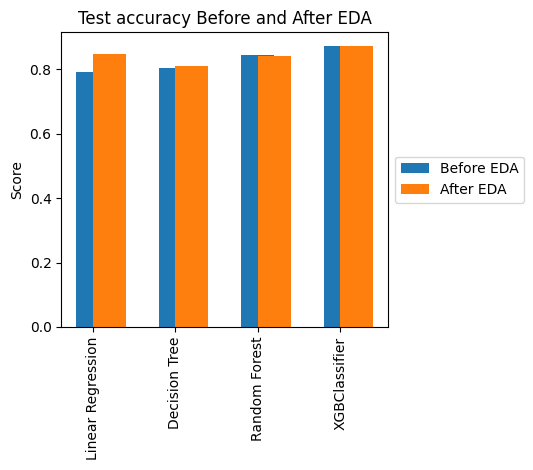

In [214]:
metrics = ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBClassifier']
before_eda = [lr_ac,dt_ac,rf_ac,xg_ac]
after_eda = [lr_ac1,dt_ac1,rf_ac1,xg_ac1]

x = range(len(metrics))

plt.bar(x, before_eda, width=0.4, label='Before EDA', align='center')
plt.bar(x, after_eda, width=0.4, label='After EDA', align='edge')

plt.xticks(x, metrics,rotation=90)
plt.ylabel('Score')
plt.title('Test accuracy Before and After EDA')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


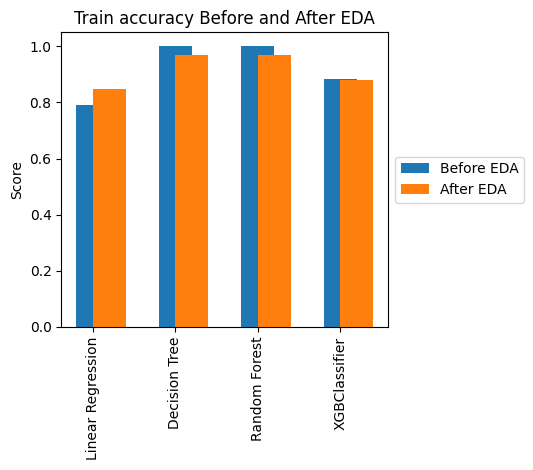

In [217]:
metrics_ = ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBClassifier']
before_eda_ = [lr_ac_tr,dt_ac_tr,rf_ac_tr,xg_ac_tr]
after_eda_ = [lr_ac1_tr,dt_ac1_tr,rf_ac1_tr,xg_ac1_tr]

x_ = range(len(metrics))

plt.bar(x_, before_eda_, width=0.4, label='Before EDA', align='center')
plt.bar(x_, after_eda_, width=0.4, label='After EDA', align='edge')

plt.xticks(x_, metrics_,rotation=90)
plt.ylabel('Score')
plt.title('Train accuracy Before and After EDA')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

In [218]:
print("Test Accuracies\n")
print("Before Exploratory Data Analysis:")
print("Linear Regression:",round(lr_ac*100,2),"%")
print("Decision Tree Classifier:",round(dt_ac*100,2),"%")
print("Random forest Classifier:",round(rf_ac*100,2),"%")
print("XGBoost Classifier:",round(xg_ac*100,2),"%\n")
print("After Exploratory Data Analysis:")
print("Linear Regression:",round(lr_ac1*100,2),"%")
print("Decision Tree Classifier:",round(dt_ac1*100,2),"%")
print("Random forest Classifier:",round(rf_ac1*100,2),"%")
print("XGBoost Classifier:",round(xg_ac1*100,2),"%\n")

Test Accuracies

Before Exploratory Data Analysis:
Linear Regression: 79.26 %
Decision Tree Classifier: 80.45 %
Random forest Classifier: 84.53 %
XGBoost Classifier: 87.12 %

After Exploratory Data Analysis:
Linear Regression: 84.64 %
Decision Tree Classifier: 81.17 %
Random forest Classifier: 84.28 %
XGBoost Classifier: 87.12 %



In [219]:
print("Train Accuracies\n")
print("Before Exploratory Data Analysis:")
print("Linear Regression:",round(lr_ac_tr*100,2),"%")
print("Decision Tree Classifier:",round(dt_ac_tr*100,2),"%")
print("Random forest Classifier:",round(rf_ac_tr*100,2),"%")
print("XGBoost Classifier:",round(xg_ac_tr*100,2),"%\n")
print("After Exploratory Data Analysis:")
print("Linear Regression:",round(lr_ac1_tr*100,2),"%")
print("Decision Tree Classifier:",round(dt_ac1_tr*100,2),"%")
print("Random forest Classifier:",round(rf_ac1_tr*100,2),"%")
print("XGBoost Classifier:",round(xg_ac1_tr*100,2),"%\n")

Train Accuracies

Before Exploratory Data Analysis:
Linear Regression: 79.09 %
Decision Tree Classifier: 100.0 %
Random forest Classifier: 100.0 %
XGBoost Classifier: 88.24 %

After Exploratory Data Analysis:
Linear Regression: 84.84 %
Decision Tree Classifier: 97.07 %
Random forest Classifier: 97.07 %
XGBoost Classifier: 87.96 %





---

